# Libraries

In [1]:
from pathlib import Path
import os
import sys
import pickle
from tqdm import tqdm
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern

*Set folders and get patients metada*

In [2]:
subfolder_path = Path.cwd()
notebooks_path = subfolder_path.parent
repo_path = notebooks_path.parent
os.chdir(str(subfolder_path))
#print current working directory
print(f'Current folder is: {os.getcwd()}\n')
thispath = Path.cwd().resolve()
sys.path.insert(0, str(thispath.parent.parent)) if sys.path[0] != str(thispath.parent.parent) else None

#Import paths and patients classes
from notebooks.info import path_label, patient


Current folder is: /home/ricardino/Documents/MAIA/tercer_semestre/CAD/Projecte/Machine_Learning/notebooks/preprocessing



# Functions

In [3]:
#print 3 channel image given its numpy array
def show_image_3channels(image, cmap='viridis'):
    """Print 3 channel image given its numpy array
    """
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap=cmap)
    plt.show()

In [4]:
def hair_removal(im_rgb, norm = False, inpaint_rad = 1):
    """hair removal function

    Args:
        im_rgb (3D array): RGB image
        norm (bool, optional): normalization boolean. Defaults to False.

    Returns:
        3D array: image without hair
    """
    im_gray = cv.cvtColor(im_rgb, cv.COLOR_RGB2GRAY) #get gray copy of image
    filter_size = (17,17) #filter size
    struct_elem = cv.getStructuringElement(1, filter_size) #SE definition
    im_norm = cv.normalize(im_gray, None, 0, 255, cv.NORM_MINMAX, cv.CV_8UC1) if norm==True else im_gray #normalize image if activated
    black_hat = cv.morphologyEx(im_norm, cv.MORPH_BLACKHAT, struct_elem) #black hat transform

    _, mask = cv.threshold(black_hat, 10, 255, cv.THRESH_BINARY) #thresholding


    im_NH = cv.inpaint(im_rgb, mask, inpaint_rad, cv.INPAINT_TELEA) #inpainting
    
    return im_NH

# IMP

In [12]:
info = path_label(classif='3_classes', set_name='train')
for i in tqdm(range(info.len)):

    pacient = patient(info=info, num=i)
    im_NH = hair_removal(pacient.RGB_im())
    im_NH = cv.cvtColor(im_NH, cv.COLOR_RGB2BGR)
    #save image as jpg file
    path_orig = str(repo_path) + '/' + pacient.path
    path_NH = path_orig.replace('images', 'images_NH')
    cv.imwrite(path_NH, im_NH)

100%|██████████| 5082/5082 [56:12<00:00,  1.51it/s]  


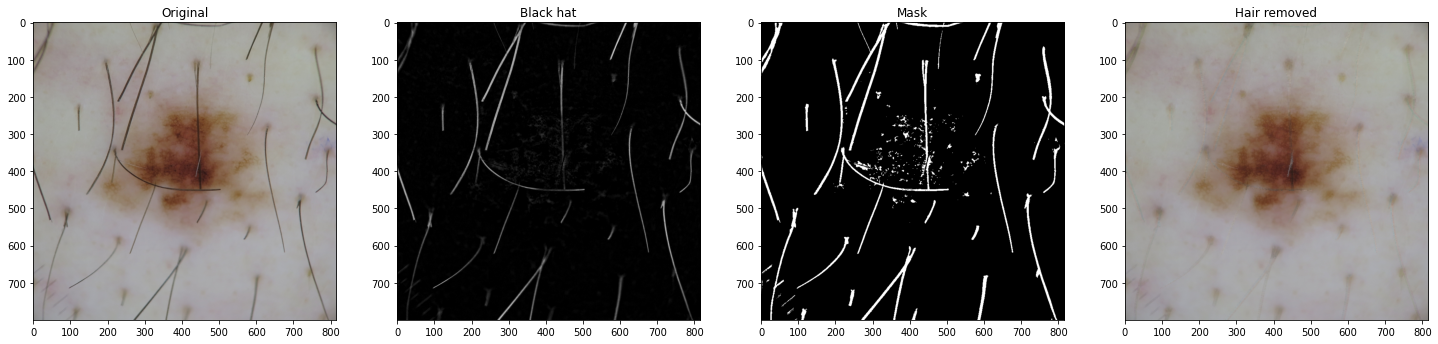

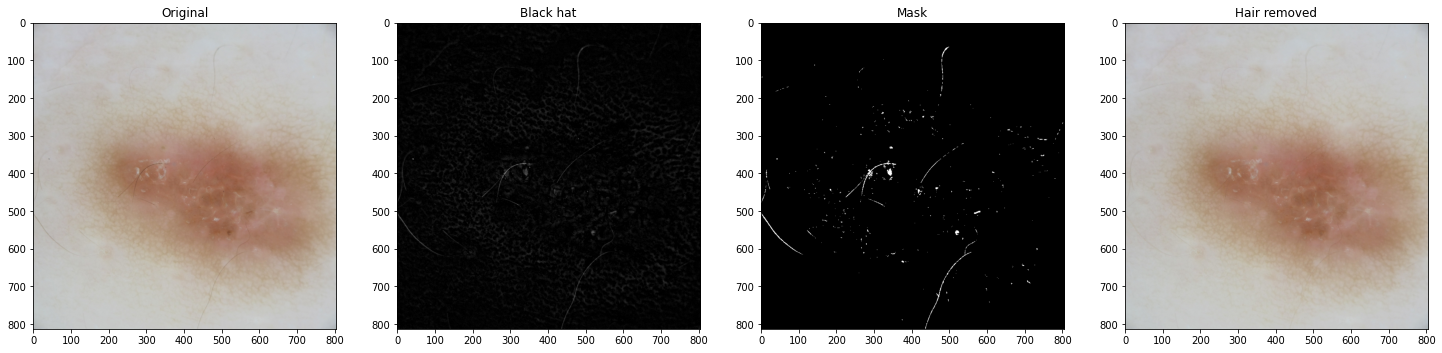

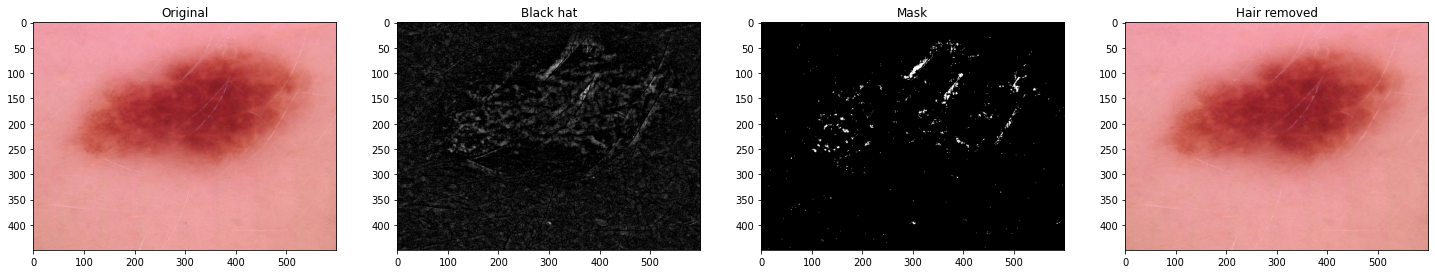

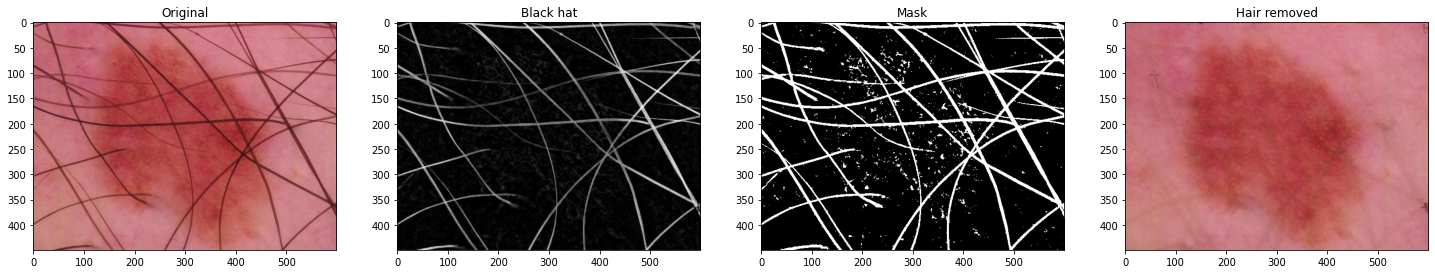

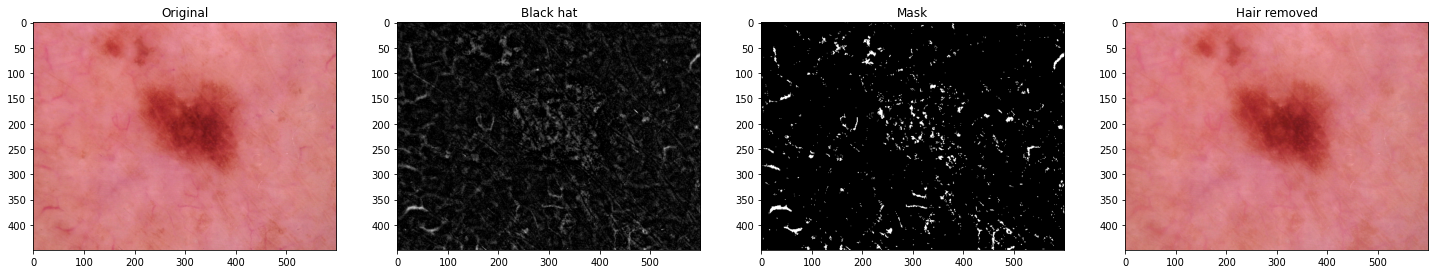

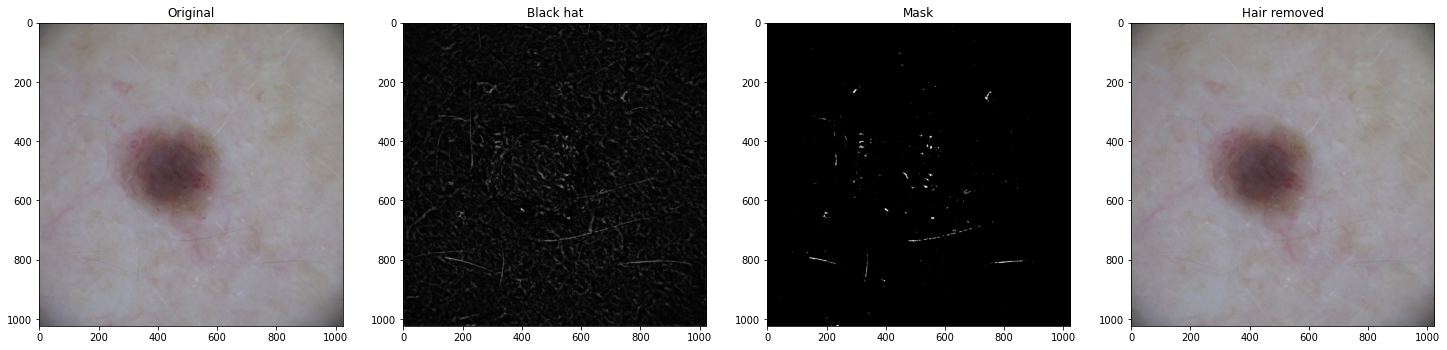

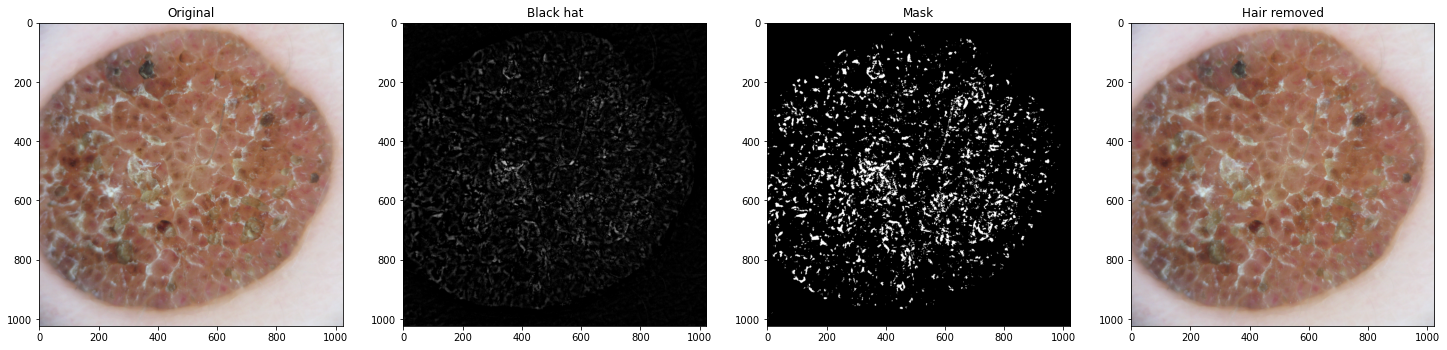

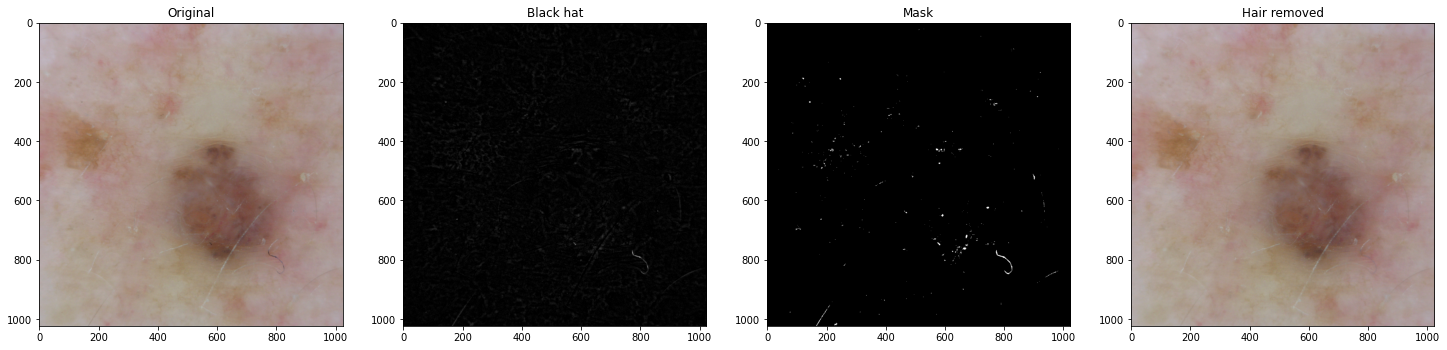

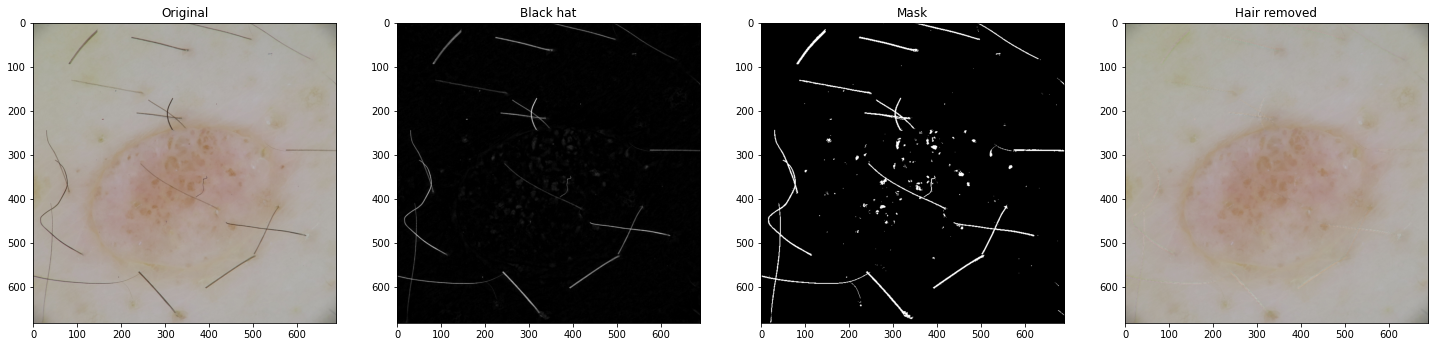

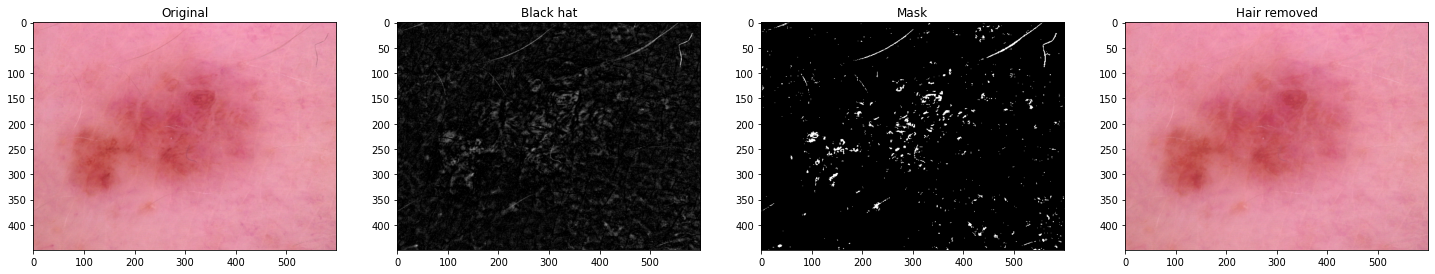

In [6]:
info = path_label(classif='binary', set_name='train')
#Example image
for i in range(10,20):

    pacient = patient(info=info, num=i)
    im_rgb = pacient.RGB_im()
    im_gray = pacient.gray_im() #gray image

    #IMP
    filter_size = (17,17) #filter size
    struct_elem = cv.getStructuringElement(1, filter_size) #SE definition
    #im_norm = cv.normalize(im_gray, None, 0, 255, cv.NORM_MINMAX, cv.CV_8UC1) #normalize image
    im_norm = im_gray
    black_hat = cv.morphologyEx(im_norm, cv.MORPH_BLACKHAT, struct_elem) #black hat transform

    _, mask = cv.threshold(black_hat, 10, 255, cv.THRESH_BINARY) #thresholding


    im_NH = cv.inpaint(im_rgb, mask, 1, cv.INPAINT_TELEA) #inpainting

    #plot 4 images
    fig, axs = plt.subplots(1, 4, figsize=(25,20))
    axs[0].imshow(im_rgb)
    axs[0].set_title('Original')
    axs[1].imshow(black_hat, cmap='gray')
    axs[1].set_title('Black hat')
    axs[2].imshow(mask, cmap='gray')
    axs[2].set_title('Mask')
    axs[3].imshow(im_NH)
    axs[3].set_title('Hair removed')